In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns
init_notebook_mode(connected=True)

In [6]:
df_data=pd.read_csv('train.csv',encoding='utf-8')
df_label=pd.read_csv('train_target.csv',encoding='utf-8')
df=pd.merge(df_data,df_label,on='id')

In [7]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['Value Example'] = df.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2)
    return summary

In [8]:
resumetable(df)

Dataset Shape: (132029, 105)


,Name,dtypes,Missing,Uniques,Value Example,Entropy
0,id,int64,0,132029,1.000000e+00,17.01
1,certId,int64,0,4033,6.405820e+05,11.10
2,loanProduct,int64,0,3,1.000000e+00,1.47
3,gender,int64,0,2,2.000000e+00,0.80
4,age,int64,0,38,2.700000e+01,4.64
5,dist,int64,0,3738,6.405000e+05,10.28
6,edu,int64,0,9,0.000000e+00,0.16
7,job,int64,0,13,8.000000e+00,2.27
8,lmt,float64,0,1718,5.963000e+00,8.74
9,basicLevel,int64,0,6,3.000000e+00,1.68


In [10]:
df[df["id"]==387]

,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target
386,387,645221,1,2,26,641900,0,3,0.896,3,...,0,16,5,-999,-999,-999,-999,1,1,0


In [10]:
df_t=df[df["target"]==1]
print(df["target"].value_counts())
df_t.head(20)

0    131070
1       959
Name: target, dtype: int64


,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target
49,50,342622,1,2,30,700100,0,5,4.296,1,...,1,1,6,1,0,1,0,0,1,1
214,215,641624,3,2,21,641624,0,4,0.800,2,...,-999,12,1,0,0,1,0,0,1,1
228,229,645281,2,2,28,645281,0,3,5.233,1,...,11,18,3,1,1,1,0,0,1,1
309,310,733524,1,1,27,640100,0,1,1.463,1,...,1,12,6,1,0,0,0,0,1,1
342,343,532522,2,2,22,550500,30,7,4.900,1,...,0,18,2,1,0,1,0,0,1,1
469,470,630726,1,2,24,630100,0,3,2.363,3,...,0,6,6,1,0,1,0,0,1,1
667,668,342303,1,1,30,341100,0,7,6.296,1,...,0,19,4,1,0,1,0,0,1,1
758,759,420181,2,1,29,420180,0,3,1.433,1,...,1,20,4,1,0,1,0,0,1,1
893,894,640183,1,2,28,640100,0,4,2.230,1,...,0,5,6,0,0,1,0,0,1,1
1057,1058,713101,1,1,24,711800,0,6,0.863,1,...,0,17,6,1,0,1,0,0,1,1


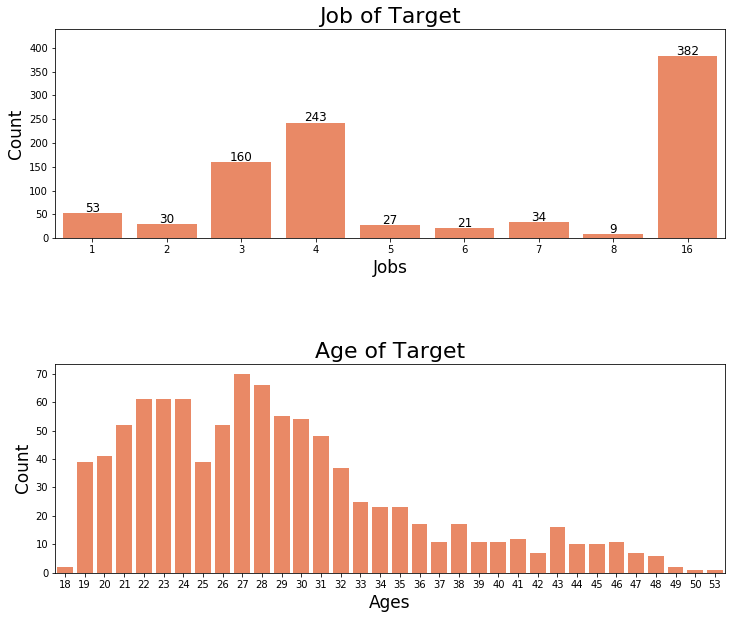

In [91]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
plt.subplot(211)
ax1 = sns.countplot(x="job", data=df[df["target"]==1], color='coral')
ax1.set_title("Job of Target", fontsize=22)
ax1.set_xlabel("Jobs", fontsize=17)
sizes=[]
index=0
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            height,
            ha="center", fontsize=12) 
ax1.set_ylim(0, max(sizes) * 1.15)
ax1.set_ylabel("Count", fontsize=17)
plt.subplot(212)
ax2 = sns.countplot(x="age", data=df[df["target"]==1], color='coral' )
ax2.set_title("Age of Target", fontsize=22)
ax2.set_xlabel("Ages", fontsize=17)
ax2.set_ylabel("Count", fontsize=17)
plt.subplots_adjust(hspace = 0.6)

plt.show()